<a href="https://colab.research.google.com/github/cristian-rincon/escuela-datascience/blob/master/introduccion_web_scraping/scraping_et.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [1]:
import requests

In [2]:
url_base = "https://eltiempo.com"

In [3]:
eltiempo = requests.get(url_base)
eltiempo.status_code

200

## Importando BeautifulSoup

In [4]:
from bs4 import BeautifulSoup

In [5]:
et_soup = BeautifulSoup(eltiempo.text,'lxml')
type(et_soup)

bs4.BeautifulSoup

### Menú principal del periódico

In [6]:
menu = et_soup.find('ul', attrs={'class':'default-menu'}).find_all('li')

In [7]:
colombia_item = menu[1]
colombia_item

<li class="colombia" itemprop="name">
<a href="/colombia" itemprop="url">Colombia</a>
</li>

### Obteniendo el texto al interior de una etiqueta

In [8]:
colombia_item.a.get_text()

'Colombia'

### Obteniendo el link de la etiqueta a

In [9]:
colombia_item.a.get('href')

'/colombia'

In [10]:
menu_links = [menu_item.a.get('href') for menu_item in menu]
menu_links

['/opinion',
 '/colombia',
 '/bogota',
 '/mundo',
 '/politica',
 '/justicia',
 '/economia',
 '/deportes',
 '/cultura',
 '/tecnosfera',
 '/vida',
 '/salud',
 '/unidad-investigativa',
 '/multimedia/videos']

In [11]:
colombia_section = requests.get(url_base + menu_links[1])
colombia_section

<Response [200]>

In [12]:
colombia_soup = BeautifulSoup(colombia_section.text, 'lxml')
colombia_soup.prettify()

'<!DOCTYPE html>\n<html>\n <head>\n  <script type="text/javascript">\n   var _sf_startpt=(new Date()).getTime()\n  </script>\n  <meta content="text/html; charset=utf-8" http-equiv="Content-Type"/>\n  <script type="text/javascript">\n   window.NREUM||(NREUM={}),__nr_require=function(t,e,n){function r(n){if(!e[n]){var o=e[n]={exports:{}};t[n][0].call(o.exports,function(e){var o=t[n][1][e];return r(o||e)},o,o.exports)}return e[n].exports}if("function"==typeof __nr_require)return __nr_require;for(var o=0;o<n.length;o++)r(n[o]);return r}({1:[function(t,e,n){function r(t){try{s.console&&console.log(t)}catch(e){}}var o,i=t("ee"),a=t(23),s={};try{o=localStorage.getItem("__nr_flags").split(","),console&&"function"==typeof console.log&&(s.console=!0,o.indexOf("dev")!==-1&&(s.dev=!0),o.indexOf("nr_dev")!==-1&&(s.nrDev=!0))}catch(c){}s.nrDev&&i.on("internal-error",function(t){r(t.stack)}),s.dev&&i.on("fn-err",function(t,e,n){r(n.stack)}),s.dev&&(r("NR AGENT IN DEVELOPMENT MODE"),r("flags: "+a(s,fu

### Obteniendo el artículo principal

In [13]:
def get_feature_article(soup):
    feature_article = soup.find('div',attrs={'class':'apertura-seccion'})
    article_link = feature_article.a.get('href')
    return article_link

In [14]:
get_feature_article(colombia_soup)

'/colombia/otras-ciudades'

### Obteniendo la lista de artículos secundarios

In [15]:
def get_articles_list(soup):
    articles_list = []
    feature_article = get_feature_article(soup)
    if feature_article:
        articles_list.append(feature_article)
    posts_list = soup.find('div',attrs={'class':'notas-col-izq'})
    for article in posts_list.find_all('a'):
        articles_list.append(article.get('href'))
    return list(set(articles_list))

In [16]:
# Revisar set() para eliminar los duplicados de la lista, convertir de nuevo en una lista 
# https://docs.python.org/3.8/library/stdtypes.html#set-types-set-frozenset
articles_list = get_articles_list(colombia_soup)
articles_list

['/colombia/cali/denuncian-presunto-abuso-policial-contra-menor-en-jambalo-cauca-537283',
 None,
 '/colombia/otras-ciudades',
 '/colombia/cali',
 '/mas-contenido',
 '/mas-contenido/agro-cundinamarques-para-40-000-familias-de-la-region-535622',
 '/colombia/otras-ciudades/regreso-de-familia-desplazada-en-mapiripan-meta-por-paramilitares-537296',
 '/colombia/otras-ciudades/invierno-en-colombia-cierre-total-de-via-entre-huila-y-caqueta-537123',
 '/colombia/cali/rogar-perdon-a-mujer-le-saldra-caro-a-quien-lo-hizo-con-pasacalles-537216',
 '/colombia/cali/ataque-sicarial-contra-dos-mujeres-conmociona-en-el-sur-de-cali-537046',
 '/colombia/otras-ciudades/velaton-por-crimen-de-menor-de-17-anos-a-manos-de-la-policia-537041']

### Obtener la información de un artículo

In [17]:
def scrap_article(url_article):
    try:
        article = requests.get(url_article)
        if article.status_code == 200:
            article_soup = BeautifulSoup(article.text,'html5lib') # .prettify()
            # Extracting Title
            title = article_soup.find('h1', attrs={'class':'titulo'})
            print(title.text)
            # Extracting volanta
            volanta = article_soup.find('p', attrs={'class':'info'})
            print(volanta.text)
            # Extracting date
            date = article_soup.find('span', attrs={'class':'fecha'})
            print(date.text)
            # Extracting Author
            author = article_soup.find('span', attrs={'class':'nombre'})
            print(author.text)
            # Extracting text
            text = article_soup.find_all('p', attrs={'class':'contenido'})
            for t in text:
                print(t.text)
    except Exception as e:
        print('Ha ocurrido un error con la extracción del artículo.')
        print(e)
        print('\n')

In [18]:
# !pip install -U beautifulsoup4

In [19]:
article_test = url_base + articles_list[0]
# article_test
# article_test = requests.get(article_test)
# article_soup = BeautifulSoup(article_test.text,'lxml').prettify()
#scrap_article(article_test)
article_test

'https://eltiempo.com/colombia/cali/denuncian-presunto-abuso-policial-contra-menor-en-jambalo-cauca-537283'

In [20]:
scrap_article(article_test)

Ha ocurrido un error con la extracción del artículo.
Couldn't find a tree builder with the features you requested: html5lib. Do you need to install a parser library?




In [21]:
media_req = requests.get(article_test)


In [23]:
media = BeautifulSoup(media_req.text,'lxml')
# media

In [24]:
media_fig = media.find('figure', attrs={'class':'foto-apertura-articulo'})
images = media_fig.find_all('img')
images

[]

In [25]:
if len(images) == 0:
    print('No se encontraron imágenes')
else:
    image = images[-1]
    img_src = image.get('data-original')
    print(img_src)

/files/article_main/uploads/2018/03/23/5ab5a24b9e9ed.jpeg


In [26]:
img_req = requests.get(url_base + img_src)
img_req

<Response [201]>

In [27]:
# To see images on jupyter
from IPython.display import Image

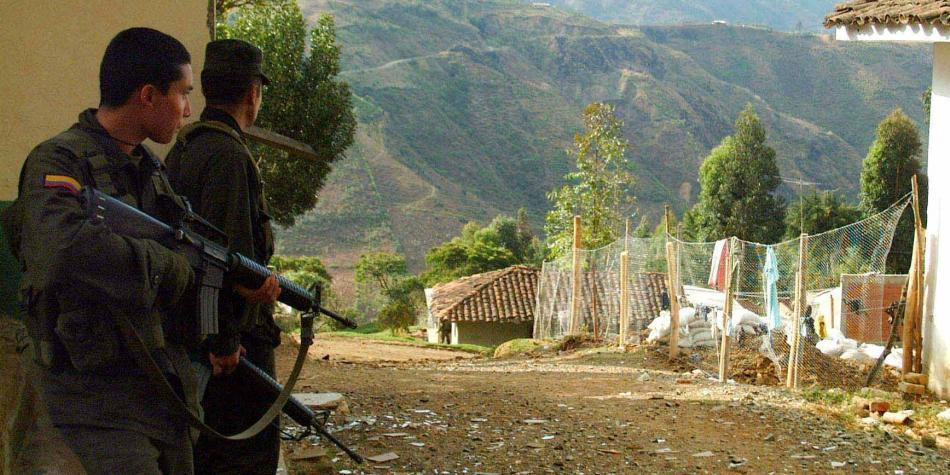

In [28]:
Image(img_req.content)